## 라이브러리 가져오기

In [11]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor # 분석 알고리즘 DecisionTree 구현 라이브러리
from sklearn.linear_model import LinearRegression # 변동성이 약한 데이터에서는 강한 모습을 보인다.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 과거 데이터를 8:2나 7:3으로 자동으로 나눠주는 함수
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error # 분석 평가 대표지표 : MAE
from sklearn.metrics import mean_squared_error # 분석 평가 대표지표 : RMSE
# 머신러닝 라이브러니
from sklearn.svm import SVC # 서포트 vector
from sklearn.neighbors import KNeighborsClassifier # k neighbors
# 데이터 전처리 라이브러리
from sklearn.model_selection import train_test_split
# 클래시피케이션 metricx 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score # 정확도 지표들
# 결과를 출력하기 위한 라이브러리
from sklearn.metrics import classification_report

## 데이터 불러오기

In [5]:
# # 오스트리아
# atData = \
# pd.read_csv("../../stddev/archive/at.csv", encoding = "ms949")

# # 벨기에
# beData = \
# pd.read_csv("../../stddev/archive/be.csv", encoding = "ms949")

# # 스위스
# chData = \
# pd.read_csv("../../stddev/archive/ch.csv", encoding = "ms949")

# # 독일
# deData = \
# pd.read_csv("../../stddev/archive/de.csv", encoding = "ms949")

# #덴마크
# dkData = \
# pd.read_csv("../../stddev/archive/dk.csv", encoding = "ms949")

# #스페인
# esData = \
# pd.read_csv("../../stddev/archive/es.csv", encoding = "ms949")

# # 프랑스
# frData = \
# pd.read_csv("../../stddev/archive/fr.csv", encoding = "ms949")

# # 영국
# gbData = \
# pd.read_csv("../../stddev/archive/gb.csv", encoding = "ms949")

# # 아일랜드
# ieData = \
# pd.read_csv("../../stddev/archive/ie.csv", encoding = "ms949")

# # 이탈리아
# itData = \
# pd.read_csv("../../stddev/archive/it.csv", encoding = "ms949")

# # 네덜란드
# nlData = \
# pd.read_csv("../../stddev/archive/nl.csv", encoding = "ms949")

# # 노르웨이
# noData = \
# pd.read_csv("../../stddev/archive/no.csv", encoding = "ms949")

# # 포르투갈
# ptData = \
# pd.read_csv("../../stddev/archive/pt.csv", encoding = "ms949")

# 스웨덴
seData = \
pd.read_csv("../../stddev/archive/se.csv", encoding = "ms949")

In [9]:
x=seData['end']
y=seData['load']

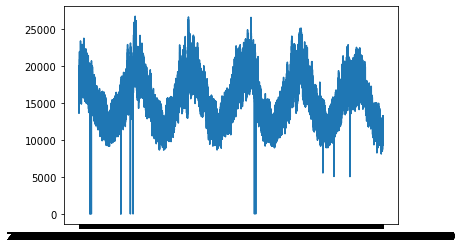

In [12]:
plt.plot(x,y)

## 데이터 전처리

In [4]:
seData = seData.astype( { "start":str,
                    "end":str,
                    "load":float
                    } )

In [5]:
seData.shape

(48887, 3)

In [6]:
seData['start'] = seData['start'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
seData['end'] = seData['end'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
seData = seData.sort_values(["end"], ignore_index=True)
seData

,start,end,load
0,201501010000000000,201501010100000000,14726.0
1,201501010100000000,201501010200000000,14485.0
2,201501010200000000,201501010300000000,14298.0
3,201501010300000000,201501010400000000,14249.0
4,201501010400000000,201501010500000000,14268.0
...,...,...,...
48882,202007311900000000,202007312000000000,11880.0
48883,202007312000000000,202007312100000000,11666.0
48884,202007312100000000,202007312200000000,10977.0
48885,202007312200000000,202007312300000000,10430.0


In [41]:
seData['load'].np.where(seData['load'] > 15, True, False)

0        14726.0
1        14485.0
2        14298.0
3        14249.0
4        14268.0
          ...   
48882    11880.0
48883    11666.0
48884    10977.0
48885    10430.0
48886    10152.0
Name: load, Length: 48887, dtype: float64

## 데이터 분리

In [7]:
standardYEARWEEK = 0.8
selectedIndex = int(list(seData.shape)[0] * standardYEARWEEK)
yearweekStd = seData.loc[selectedIndex].end
yearweekStd

'201906201400000000'

In [8]:
features_data80,\
features_data20,\
label_data80,\
label_data20 = train_test_split(seData.loc[:,['end']],\
                                seData.loc[:,['load']],test_size=0.2,random_state=5)

## 모델 적용(의사결정나무)

In [9]:
model = DecisionTreeRegressor(random_state=5)
model.fit(X=features_data80 ,y=label_data80)

DecisionTreeRegressor(random_state=5)

## 예측(의사결정나무)

In [25]:
predictValue = model.predict(features_data20)
predictDF = pd.DataFrame(list(predictValue),columns=['PREDICT'])
validateDf = pd.concat([label_data20.reset_index(drop=True),predictDF],axis=1)
# 정확도 컬럼 추가
acc = pd.DataFrame(list(1-abs(validateDf['load']-validateDf['PREDICT'])/validateDf2['load']),columns=['acc'])
realValidateDf = pd.concat([validateDf.reset_index(drop=True),acc],axis=1)
realValidateDf

,load,PREDICT,acc
0,10413.0,10935.933333,0.949781
1,14273.0,15151.842105,0.938426
2,15522.0,18154.148148,0.830425
3,18232.0,18261.594595,0.998377
4,18390.0,18034.923077,0.980692
...,...,...,...
9773,11820.0,13302.921053,0.874541
9774,19950.0,18290.032258,0.916794
9775,16782.0,14619.771429,0.871158
9776,21755.0,19594.375000,0.900684


## 정확도 검증(의사결정나무)

In [11]:
# MAE 평균절대오차
mae = mean_absolute_error(y_true=validateDf.load,
                   y_pred=validateDf.PREDICT)

# RMSE는 평균제곱근오차 MAE와 유사
# RMSE는 MAE에 비해 직관성은 떨어지지만, 로버스트한 성격(=극단적이지 않은)에서 강점을 보인다고 정리할 수 있다.
# "큰 오류값 차이에 대해서 크게 패널티를 주는" 이점이 있음
rmse = np.sqrt(mean_squared_error(y_true=validateDf.load,
                   y_pred=validateDf.PREDICT))
mae,rmse

(1437.1669439166624, 1736.558449268466)

## 모델 적용(랜덤 포레스트)

In [12]:
model2 = RandomForestRegressor(random_state=5)
model2.fit(X=features_data80, y=label_data80)

<ipython-input-12-ebe69355c09b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X=features_data80, y=label_data80)


RandomForestRegressor(random_state=5)

## 예측(랜덤 포레스트)

In [24]:
predictValue2 = model2.predict(features_data20)
predictDF2 = pd.DataFrame(list(predictValue2),columns=['PREDICT2'])
validateDf2 = pd.concat([label_data20.reset_index(drop=True),predictDF2],axis=1)
# 정확도 컬럼 추가
acc2 = pd.DataFrame(list(1-abs(validateDf2['load']-validateDf2['PREDICT2'])/validateDf2['load']),columns=['acc2'])
realValidateDf2 = pd.concat([validateDf2.reset_index(drop=True),acc2],axis=1)
realValidateDf2

,load,PREDICT2,acc2
0,10413.0,10917.212913,0.951579
1,14273.0,15165.240524,0.937488
2,15522.0,18148.973638,0.830758
3,18232.0,18283.654283,0.997167
4,18390.0,18023.071520,0.980047
...,...,...,...
9773,11820.0,13280.148078,0.876468
9774,19950.0,18282.852635,0.916434
9775,16782.0,14618.347124,0.871073
9776,21755.0,19584.924866,0.900249


## 정확도 검증(랜덤 포레스트)

In [14]:
# MAE 평균절대오차
mae2 = mean_absolute_error(y_true=validateDf2.load,
                   y_pred=validateDf2.PREDICT2)

# RMSE는 평균제곱근오차 MAE와 유사
# RMSE는 MAE에 비해 직관성은 떨어지지만, 로버스트한 성격(=극단적이지 않은)에서 강점을 보인다고 정리할 수 있다.
# "큰 오류값 차이에 대해서 크게 패널티를 주는" 이점이 있음
rmse2 = np.sqrt(mean_squared_error(y_true=validateDf2.load,
                   y_pred=validateDf2.PREDICT2))
mae2,rmse2

(1437.1104925242112, 1738.4280830913592)

## 모델 적용(선형회귀)

In [29]:
model3 = LinearRegression()
model3.fit(X=features_data80 ,y=label_data80)

LinearRegression()

In [35]:
model3.coef_

array([[-3.07228998e-14]])

In [36]:
model3.intercept_

array([21788.72650028])

In [38]:
predictValue3 = model3.predict(features_data20)
predictDF3 = pd.DataFrame(list(predictValue3),columns=['PREDICT3'])
validateDf3 = pd.concat([label_data20.reset_index(drop=True),predictDF3],axis=1)

acc3 = pd.DataFrame(list(1-abs(validateDf3['load']-validateDf3['PREDICT3'])/validateDf3['load']),columns=['acc3'])
realValidateDf3 = pd.concat([validateDf3.reset_index(drop=True),acc3],axis=1)
realValidateDf3

,load,PREDICT3,acc3
0,10413.0,15582.483833,0.503555
1,14273.0,15591.785498,0.907603
2,15522.0,15585.674707,0.995898
3,18232.0,15591.848108,0.855191
4,18390.0,15588.721463,0.847674
...,...,...,...
9773,11820.0,15597.754023,0.680393
9774,19950.0,15594.647311,0.781687
9775,16782.0,15597.751523,0.929433
9776,21755.0,15594.617178,0.716829


In [40]:
realValidateDf3.acc3.mean()

-inf

In [39]:
# MAE 평균절대오차
mae3 = mean_absolute_error(y_true=validateDf3.load,
                   y_pred=validateDf3.PREDICT3)

# RMSE는 평균제곱근오차 MAE와 유사
# RMSE는 MAE에 비해 직관성은 떨어지지만, 로버스트한 성격(=극단적이지 않은)에서 강점을 보인다고 정리할 수 있다.
# "큰 오류값 차이에 대해서 크게 패널티를 주는" 이점이 있음
rmse3 = np.sqrt(mean_squared_error(y_true=validateDf3.load,
                   y_pred=validateDf3.PREDICT3))
mae3,rmse3

(2788.397503962709, 3414.072749095544)

## 서포터백터가 속도적으로 가장 빠르다.
## 모델을 여러가지 적용해서 가장 높은 정확도를 도출하는 머신러닝을 찾는것, 또는 데이터셋에 맞춘 모델을 찾는 것을 목표로 한다.

## 진짜 예측해보기